# CT5134: Agents, Multi-Agent Systems, and Reinforcement Learning 

## Assignment 2: Q-Learning Implementation for FrozenLake Problem 

#### **Submitted By**: Kalyani Prashant Kawale
#### **Student ID**: 21237189

## Part 1: Create the FrozenLake

In [1]:
import numpy as np

### 1.1 Setting up FrozenLake grid:

Based on the requirements specified for the FrozenLake grid, a **5x5 grid**, with **start state** at position **(0, 0)**, a **goal state** with position at **(5, 5)** and **hole states** at positions **(1,0), (1,3), (3,1)** and **(4,2)** are initialised with the following variables,

In [2]:
# Initialising the grid variables, accessible globally
# Setting the rows of the grid
LAKE_ROWS = 5
# Setting the columns of the grid
LAKE_COLUMNS = 5
# Setting the start state
START_STATE = (0, 0)
# Setting the goal state
GOAL_STATE = (5, 5)
# Setting the state that contain holes
HOLES = [(1,0), (1,3), (3,1), (4,2)]

### 1.2 State Configurations for the FrozenLake Grid Environment:

* The **FrozenLake environment** is designed through the **State class** with a **state property** which maintains the current state of the system.
* The State class also implements following three methods, 
    1. **get_reward()** for returning the reward based on the current state the agent is in.
    2. **is_terminal()** for checking if the agent has reached a terminal state. A state is termed terminal if it is either the goal state (GOAL_STATE) or one of the hole states (HOLES).
    3. **next_position()** for identifying the next state based on the action taken by the agent.

In [3]:
# Following class is a modified version of State class of Grid World Value Iteration code
# Source: Week 9 - Model Free Learning - Gridworld_valueIteration_action_values_Exercise1.py
# Original Author: Dr. Enda Barrett
# Modified by: Kalyani Prashant Kawale

class State:
    
    # Initialising the state with START_STATE
    def __init__(self, state=START_STATE):    
        self.state = state        
    
    def get_reward(self):
        """
            Method to get the rewards for state transitions
        """
        if self.state == GOAL_STATE:
            return 10
        elif self.state in HOLES:
            return -5
        else:
            return -1
    
    def is_terminal(self):
        """
            Method to check if agent is in terminal state, where 
            terminal state could be the goal state or any of the hole states
        """
        if (self.state == GOAL_STATE) or (self.state in HOLES):
            return True
        return False
    
    def get_next_position(self, action):
        """
            Method to determine the next state of the agent 
            based on the action taken
        """
        # if action up, move one row up, keeping the column same
        if action == 0:                
            next_state = (self.state[0] - 1, self.state[1])
        # if action down, move one row down, keeping the column same 
        elif action == 1:
            next_state = (self.state[0] + 1, self.state[1])
        # if action left, move one column back, keeping the row same 
        elif action == 2:
            next_state = (self.state[0], self.state[1] - 1)
        # if action right (action=3), move one column forward, keeping the row same 
        else:
            next_state = (self.state[0], self.state[1] + 1)
        # if next state is within the 5x5 grid of FrozenLake returning the next state
        if (next_state[0] >= 0) and (next_state[0] <= 4):
            if (next_state[1] >= 0) and (next_state[1] <= 4):                    
                    return next_state # if next state legal
        # keeping state unchanged for move off the grid
        return self.state
    

## Part 2: Implement the Reinforcement Learning algorithm Q-learning

### 2.1 Setting up Agent Configurations:

The Q-learning algorithm is implemented as a method of the Agent class, as the agent learns the policy by responding to the environment.

The Agent class has following properties or attributes that enables it to carry out episodes in the FrozenLake environment designed using the State class defined in Part 1.2,

   1. **actions**: List representing numerically encoded values for the **up**, **down**, **left** and **right** actions.
   2. **alpha**: The learning rate that controls the pace of the learning process. Since it is set at 0.5, which is relatively higher, the influence of old action value estimate would be lower on the learning process. 
   3. **gamma**: The discount factor that controls how much influence immediate reward has on the learning process. Since it is set at 0.9, it means immediate rewards get more importance.
   4. **epsilon**: Probability with which a random action is chosen, used to implement epsilon-greedy scheme for selection of action for current state. epsilon decides how much the algorithm is allowed to explore over exploitation, which occurs when only the action with maximum value is chosen.
   5. **Q**: Dictionary which simulates the Q-Table to store the action value estimate for each state and action pair.


In [4]:
# Following class is a modified version of Agent class of Grid World Value Iteration code
# Source: Week 9 - Model Free Learning - Gridworld_valueIteration_action_values_Exercise1.py
# Original Author: Dr. Enda Barrett
# Modified by: Kalyani Prashant Kawale

class Agent:
    
    # Initialising the class properties
    def __init__(self):        
        self.actions = [0, 1, 2, 3] # up, down, left, right
        self.State = State()
        self.alpha = 0.5
        self.gamma = 0.9
        self.epsilon = 0.1
        # Initialising all the action value estimates to 0
        self.Q = {}        
        for row in range(LAKE_ROWS):
            for col in range(LAKE_COLUMNS):
                for action in range(len(self.actions)):
                    # setting initial value to 0, for Q(s,a)
                    self.Q[(row, col, action)] = 0
    
    def get_max_act_val(self, state):
        """
            Method to find the maximum action value estimate for a given state
        """
        max_value = -999
        max_action = -1
        # Getting the action with max action 
        # value estimate in current state
        for action in self.actions:
            if self.Q[(state[0], state[1], action)] >= max_value:                             
                max_value = self.Q[(state[0], state[1], action)]
                max_action = action            
        return max_value, max_action
        
        
    def Q_Learning(self, episodes):
        """
            Method to perform the off-policy Q-learning for the Agent
            params :: episodes: number of episodes for which the 
                                FrozenLake experiment is to be run 
        """
        rewards = []
        # Repeating for each episode
        for episode in range(episodes):
            rewards_per_episode = []            
            # Initialising State to START_STATE
            self.State = State()
            
            # Repeating until terminal state is reached            
            while True:            
                # If any random value is less than epsilon 
                # selecting a random action (exploration)
                if np.random.random() <= self.epsilon:                    
                    selected_action = np.random.randint(4)
                # Else selecting the action with maximum 
                # action value estimate (exploitation)
                else:
                    # Getting the action with max action 
                    # value estimate in current state
                    max_val, selected_action = self.get_max_act_val(self.State.state)
                
                # Observing the environment when action taken in current state
                
                # Getting the reward for current state
                reward = self.State.get_reward()
                rewards_per_episode.append(reward)
                # Getting the next state on taking selected action
                state_prime = self.State.get_next_position(selected_action)                
                
                # Calculating max action value estimate for S prime
                next_max_value, next_max_action = self.get_max_act_val(state_prime)
    
                # Updating action value estimate for current state action pair,
                # using the Temporal Difference update rule
                current_value = self.Q[(self.State.state[0], self.State.state[1], selected_action)]
                error = reward + (self.gamma * next_max_value) - current_value
                current_value = current_value + (self.alpha * error)
                self.Q[(self.State.state[0], self.State.state[1], selected_action)] = current_value
                
                # Setting the state to next state
                self.State = State(state=state_prime)
                
                # Checking if terminal state is reached
                if self.State.is_terminal():
                    break
                
            # Storing the total reward for the episode
            rewards.append(sum(rewards_per_episode))
            
        # Returning rewards for all episodes
        return rewards
        
    # Method to display action value estimates
    def show_values(self):
        """
            Method to format and display action value estimates
        """
        for row in range(LAKE_ROWS):            
            print('------------------------------------------------')
            out = '| '
            for col in range(LAKE_COLUMNS):
                max_next_value, max_action = self.get_max_act_val((row, col))
                out += str(float(round(max_next_value, 3))).ljust(6) + ' | '
            print(out)
        print('------------------------------------------------')
        return "END"


### 2.2 Running the FrozenLake for 10000 episodes:

The experiment to be ran for 10000 episodes was ran 5 times to check the behaviour:

In [5]:
all_rewards = []
# Initialising 5 agents that will traverse the Frozen lake
for x in range(5):    
    # Setting random seed to reproduce the results
    np.random.seed(x)
    print(f"Agent {x + 1}")
    # Instantiating the agent
    agent = Agent()
    # Performing Q-Learning
    rewards = agent.Q_Learning(10000)
    # Saving the rewards per episode for the run
    all_rewards.append(rewards)
    # Printing the action value estimates
    print(agent.show_values())    

Agent 1
------------------------------------------------
| -1.0   | -1.9   | -1.685 | -0.938 | -0.975 | 
------------------------------------------------
| 0.0    | -1.0   | -0.969 | 0.0    | -0.5   | 
------------------------------------------------
| 0.0    | -0.75  | -0.5   | -0.5   | -0.5   | 
------------------------------------------------
| 0.0    | 0.0    | 0.0    | -0.5   | -0.5   | 
------------------------------------------------
| 0.0    | 0.0    | 0.0    | 0.0    | 0.0    | 
------------------------------------------------
END
Agent 2
------------------------------------------------
| -1.0   | -1.9   | -1.883 | -0.999 | -0.975 | 
------------------------------------------------
| 0.0    | -1.0   | -1.0   | 0.0    | -0.5   | 
------------------------------------------------
| -0.5   | -0.875 | -0.75  | 0.0    | -0.5   | 
------------------------------------------------
| 0.0    | 0.0    | 0.0    | 0.0    | 0.0    | 
------------------------------------------------
| 0.0    

* The above results display the action value estimates for 5 runs of the Agent running for 10000 episodes, when the state is initialised with the START_STATE for each episode.
* It can be observed from all 5 runs that the hole positions always have a value of 0 as opposed to other positions.

### 2.3 Plotting the Curve:

The curve of the reward per episode for each of the 5 runs is plotted below using matplotlib plotly library:


Agent 1 Rewards per Episode: 


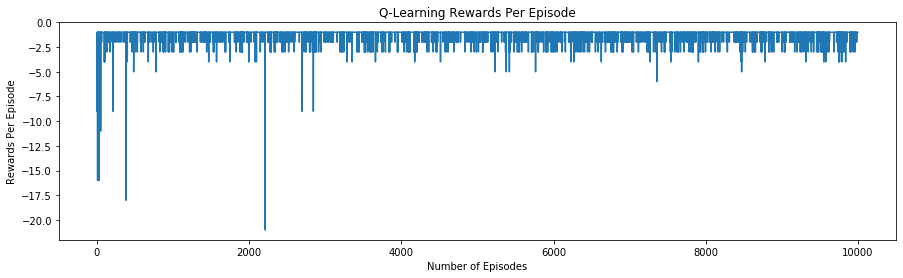


Agent 2 Rewards per Episode: 


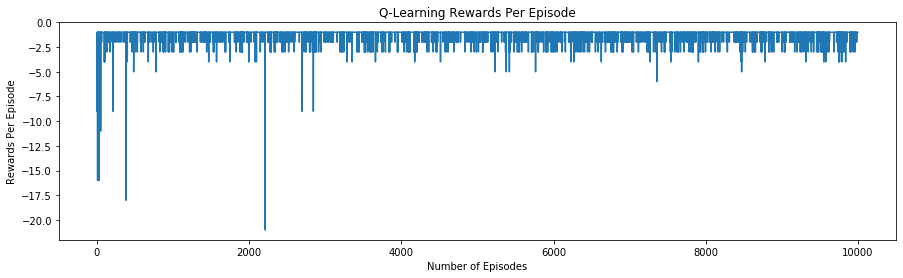


Agent 3 Rewards per Episode: 


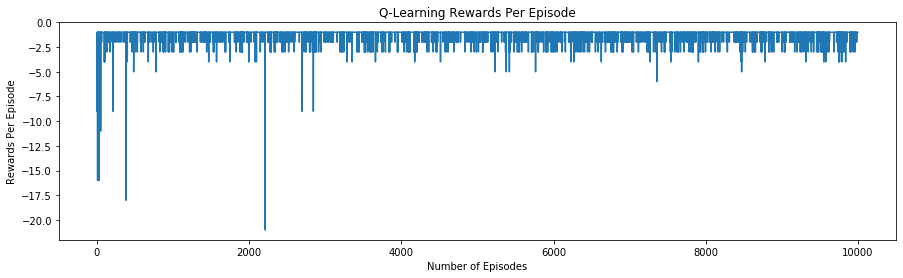


Agent 4 Rewards per Episode: 


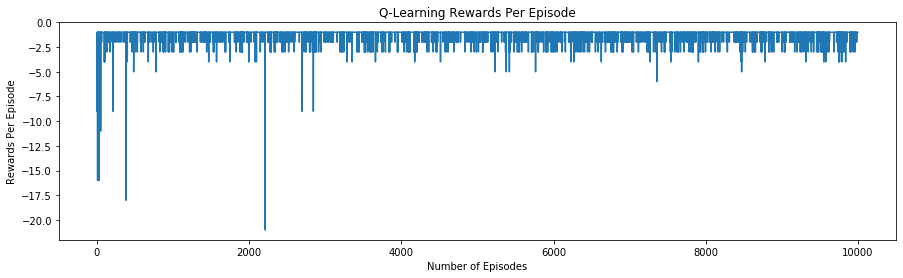


Agent 5 Rewards per Episode: 


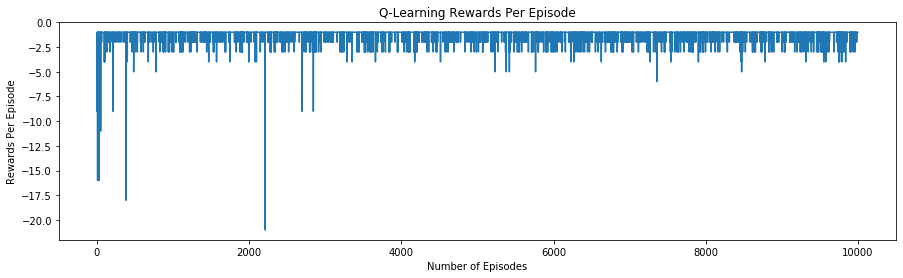

In [6]:
import matplotlib.pyplot as plt
for index, reward in enumerate(all_rewards):
    print(f"\nAgent {index + 1} Rewards per Episode: ")
    # Configuring plot size
    fig = plt.figure(figsize=(15, 4))
    # Plotting the curve
    plt.plot(range(10000), rewards)
    plt.title('Q-Learning Rewards Per Episode')
    plt.ylabel('Rewards Per Episode')
    plt.xlabel('Number of Episodes')
    plt.show()

* It can be seen from above plots that for each run, as the number of episodes progress the Rewards also progresses, with a  sharp drop in rewards around episode 2000, but it remains quite consistent after that, suggesting that for the given problem and configurations the agent should be ran well over 2000 episodes to ensure good learning.

# Acknowledgements:

Following resources were referred to perform above task,

[1] Dr. Enda Barrett. (2022). CT5134 Week 9 Learning Material - MODEL FREE LEARNING.

[2] Dr. Enda Barrett. (2022). CT5134 Week 9 Learning Material Video - Temporal Difference Learning

[3] Dr. Enda Barrett. (2022). CT5134 Week 9 Learning Material - Source Code: Gridworld_valueIteration_action_values_Exercise1.py